 #  <font color='#7E9BC0'> Movies Recommendation | movielens.org. </font>

<b> </h4> **Data Cleaning Movies Recommendation | movielens.org** </b> 
</div>

<b> **Autors:**</b> 
Juan Pablo López Salazar, Bryan Urra Calfuñir.  
</div>

<b> **Data Source:**</b> 
F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. <https://doi.org/10.1145/2827872>
</div>

# Libreries

In [1]:
import lux
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
import numpy as np
import re

%matplotlib inline


# Importing Data


In [2]:
movies = pd.read_csv("movies.csv",index_col=0)
ratings = pd.read_csv("ratings.csv")
ratings=ratings.rename(columns={'timestamp':'TimeRating'})

In [3]:
movies.columns

Index(['title', 'genres'], dtype='object')

In [4]:
movies

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193876,The Great Glinka (1946),(no genres listed)
193878,Les tribulations d'une caissière (2011),Comedy
193880,Her Name Was Mumu (2016),Drama


In [5]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'TimeRating'], dtype='object')

In [6]:
ratings

,userId,movieId,rating,TimeRating
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


For furter information abou the data sourche please check [Movielens.org](http://files.grouplens.org/datasets/movielens/ml-latest-README.html) or the file README_Dataset.txt that is inside the folder.

## Dataframes
* **Movies:** Provides the movie's name, gender and publication year.
* **ratings:** Provides the ratings gave for diferent users to a respective movie.

There are 57,771 movies

### Movies dataset transformation

In [7]:
def Año(txt): #Function that separate the year from the movie's name 
    x=re.findall(r"[(]\d+[)]", txt)
    if len(x)>=1:
        return int (x[-1][1:5]) #this is the year
    else:
        return None #There are a few movies which don't have its year
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
movies['year'] =movies['title'].apply(Año)
movies=movies[movies['year']>0]
movies['year'] = movies['year'].astype(int) 
movies=movies[movies['year']>0]
genres_list=[]
for a in movies['genres']:
  genres_list=genres_list+a
genres=list(set(genres_list))
for b in genres:
  movies[b]=0
  for a in movies.index:
    if b in movies['genres'][a]:
      movies[b][a]=1
movies.drop('genres',axis=1,inplace=True)
movies.head()

<ipython-input-7-3094dab816e0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['year'] = movies['year'].astype(int)
<ipython-input-7-3094dab816e0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[b][a]=1


,title,year,Western,Action,Crime,Fantasy,Sci-Fi,Horror,Animation,Adventure,...,Romance,Thriller,Children,War,Comedy,Film-Noir,(no genres listed),IMAX,Drama,Documentary
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995,0,0,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
2,Jumanji (1995),1995,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,Waiting to Exhale (1995),1995,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5,Father of the Bride Part II (1995),1995,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


With this code the year column was created, as weel the categorical vairables of genres.

### Número de Películas por año

Text(0, 0.5, 'Movies Count')

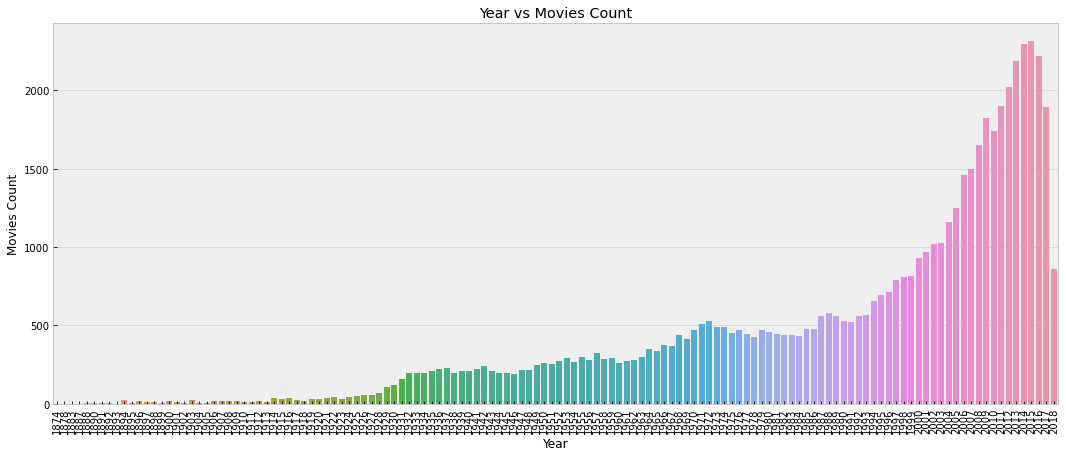

In [8]:
plt.figure(figsize=(18,7))
moviesYear=movies.groupby('year')['title'].count()
plt.title("Year vs Movies Count")
fig=sns.barplot(x=moviesYear.index, y=moviesYear.values)

fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
0
plt.xlabel("Year")
plt.ylabel("Movies Count")


There are are a big dispersion about the number of movies published for year, so we will only consider the movies published after 1970.
When a movie is old is more probable that only a person who wants to see it becuase he likes it will rate that movie, so its not very representative.

If you're using a normal computer use more recent movies (at least 1990), so you will not have problems running models.

In [9]:
movies=movies[movies['year']>1970]
movies

,title,year,Western,Action,Crime,Fantasy,Sci-Fi,Horror,Animation,Adventure,...,Romance,Thriller,Children,War,Comedy,Film-Noir,(no genres listed),IMAX,Drama,Documentary
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995,0,0,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
2,Jumanji (1995),1995,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,Waiting to Exhale (1995),1995,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5,Father of the Bride Part II (1995),1995,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193872,Room Laundering (2018),2018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
193878,Les tribulations d'une caissière (2011),2011,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
193880,Her Name Was Mumu (2016),2016,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Tags
Corresponde a las palabras más características o a las etiquetas que se le coloca a las películas, no todas las películas poseen tags.

Existen 1.108.997 datos

In [ ]:
tags = pd.read_csv("/content/drive/MyDrive/tags.csv")
tags.drop('timestamp',axis=1,inplace=True)
tags.sort_values(by='movieId')

,userId,movieId,tag
708618,149958,1,funny
930714,218248,1,adventure
939241,222966,1,animation
939242,222966,1,Disney
939243,222966,1,pixar
...,...,...,...
467946,74447,193868,Mexican
467947,74447,193868,Mexico
467948,74447,193868,musical
467942,74447,193868,comedy


## Tags más relevantes

In [ ]:
TagsGrup=tags.groupby('tag')['tag'].count().sort_values(ascending=False)
TagImportantes=TagsGrup[0:20]
print("Tags Importantes")
print(TagImportantes.head(20))


Tags Importantes
tag
sci-fi                9400
atmospheric           6430
action                6219
comedy                5923
surreal               5299
based on a book       5294
funny                 4864
twist ending          4844
visually appealing    4333
dystopia              4268
dark comedy           4026
BD-R                  4024
romance               3867
fantasy               3829
stylized              3804
classic               3778
thought-provoking     3753
psychology            3691
woman director        3669
quirky                3625
Name: tag, dtype: int64


In [ ]:
tags[tags['tag'].isin(list(TagImportantes.index))]

,userId,movieId,tag
2,14,260,sci-fi
16,27,260,sci-fi
44,56,79702,stylized
51,56,88129,atmospheric
60,75,608,dark comedy
...,...,...,...
1108939,283206,4993,atmospheric
1108944,283206,5952,action
1108958,283206,43744,romance
1108961,283206,54259,atmospheric


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


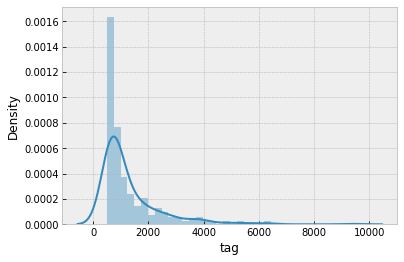

In [ ]:
sns.distplot(TagsGrup[TagsGrup>500])
# Se seleccionan los Tags que se repiten al menos 500 veces, y se puede concluir que la distribución de 

### Descartado de Tags

In [ ]:
len(tags[tags['tag'].isin(list(TagImportantes.index))]['movieId'].unique())

13568

In [ ]:
print("Las 20 tags más Comunes, solo explican el "+ str(round(len(tags[tags['tag'].isin(list(TagImportantes.index))]['movieId'].unique())/len(tags['movieId'].unique()),2)) +"% de las películas")

Las 20 tags más Comunes, solo explican el 0.3% de las películas


No se utilizarán los datos del archivo tags, debido a que se repiten pocas veces y los 20 tags o etiquetas más importantes no estan presentes ni siquiera en el 0.3% de las películas, por lo cual para obtener información relevante para el modelo se requeriría mucho esfuerzo computacional, para que recién sea influyente.

# Ratings Dataset Analysis

There are 27,753,442 rows

In [20]:
ratings.drop('TimeRating',axis=1,inplace=True)
ratings=ratings[ratings['movieId'].isin(movies.index)]
rat_orig=ratings
ratings

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5
...,...,...,...
27753429,283228,6377,5.0
27753430,283228,6874,4.0
27753441,283228,34405,4.5
27753442,283228,44761,4.5


When we discarded the old movies we reduce the number of rows from 27.8 millions to 20.1 millions 

## Ratings for user

In [22]:
RatUser=ratings.groupby(by='userId')['rating'].agg([len,np.mean])
RatUser

,len,mean
userId,,
1,16.0,3.312500
2,15.0,3.666667
3,9.0,3.555556
4,725.0,3.391034
5,72.0,4.263889
...,...,...
283224,231.0,3.623377
283225,20.0,3.100000
283226,11.0,1.818182


## Ratings Distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean', ylabel='Density'>

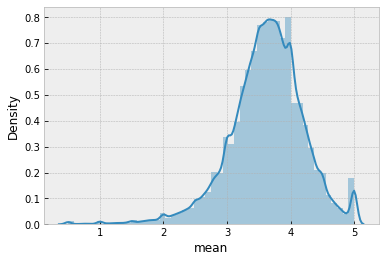

In [24]:
sns.distplot(RatUser['mean'])

In the distribution chart, we can see a distribution of the mean classification that are very similar to a normal distribution, but with the existance of people that have a very negative rates mean, and from now we'll call them "Haters". and as well people that classificate only the movies that they love and believe they are good. 

We consider that the haters not provide representative classification to this model, beacause the model try to provide movies that the people will love, but if they only classificate movies that they don't like it will not work.

In [23]:
Haters=RatUser[(RatUser['mean']<=2 )]
Haters

,len,mean
userId,,
33,1.0,1.000000
49,8.0,2.000000
87,16.0,1.906250
102,13.0,1.000000
130,70.0,1.578571
...,...,...
283134,36.0,1.777778
283141,14.0,1.750000
283180,13.0,1.923077


There are 4162 users wich a rating mean <= 2, and those are cataloged as haters, beacuse its rating are in general bad.

So in this code will not consider those users because of its big probability to don't like a movie.

### Rates per user

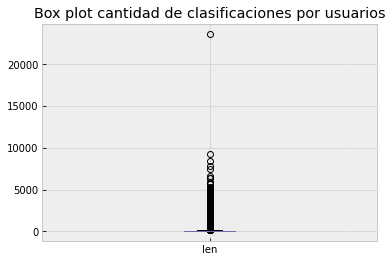

In [ ]:
plt.title("Box plot Rates per user")
RatUser.boxplot('len')

In [ ]:
Q1 = RatUser['len'].quantile(0.25)
Q2 = RatUser['len'].quantile(0.5)
Q3 = RatUser['len'].quantile(0.75)
print(Q1,Q2,Q3)
RatUser=RatUser[(RatUser['len']>10)]
RatUser.sort_values(by='len')


10.0 23.0 70.0


,len,mean
userId,,
69430,11.0,3.272727
53039,11.0,4.090909
211056,11.0,2.636364
41929,11.0,4.454545
58888,11.0,3.363636
...,...,...
37046,4213.0,3.163897
134596,4576.0,3.136582
111908,5597.0,1.453904


Para obtener valores representativos solo se considerará a los usuario que hayan generado al menos 10 calificaciones

### Haters
Gente cuyo promedio de calificaciones es menor o igual a dos

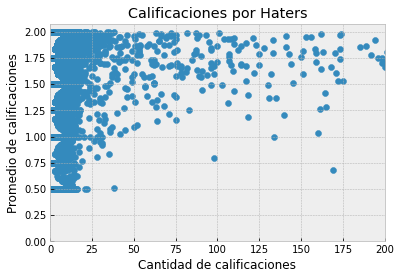

In [ ]:
plt.scatter(x='len', y="mean", data=Haters)
plt.ylim(0,) # solo para hacer que el eje y parta del 0
plt.title("Calificaciones por Haters")
plt.xlim([0,200])
plt.xlabel("Cantidad de calificaciones")
plt.ylabel("Promedio de calificaciones")
plt.show()

### Limpieza de Haters y gente con pocas calificaciones
El resultado es disminuir de 20.1 millones de calificaciones a 19.6 millones de datos

In [ ]:
ratings=ratings[(ratings['userId'].isin(Haters.index)==False) & (ratings['userId'].isin(RatUser.index))]
ratings

,userId,movieId,rating
42,4,1,4.0
43,4,2,4.0
44,4,5,2.0
45,4,6,4.5
46,4,10,4.0
...,...,...,...
27753429,283228,6377,5.0
27753430,283228,6874,4.0
27753441,283228,34405,4.5
27753442,283228,44761,4.5


## Ratings por película

In [ ]:
RatMovies=ratings.groupby(by='movieId').agg([len,np.mean])['rating'].sort_values(by='mean', ascending=False)
RatMovies['Película']=movies['title'][RatMovies.index]
RatMovies['Año']=movies['year'][RatMovies.index]
RatMovies.head(10)

,len,mean,Película,Año
movieId,,,,
129828,1.0,5.0,Lotte and the Moonstone Secret (2011),2011
182781,1.0,5.0,Amori che non sanno stare al mondo (2017),2017
182711,1.0,5.0,The World of Us (2016),2016
182657,1.0,5.0,Pale (2016),2016
148298,2.0,5.0,Awaken (2013),2013
182527,1.0,5.0,Ciutat morta (2014),2014
182435,2.0,5.0,The Most Wonderful Time of the Year (2008),2008
182425,1.0,5.0,The 9-11 Hijackers - Inside The Hamburg Cell (...,2005
182351,1.0,5.0,Fidelity (2000),2000


### Número de calificaciones por Película

In [ ]:
Q1 = RatMovies['len'].quantile(0.25)
Q2 = RatMovies['len'].quantile(0.5)
Q3 = RatMovies['len'].quantile(0.75)
print(Q1,Q2,Q3)
RatMovies=RatMovies[(RatMovies['len']>30)]
RatMovies.sort_values(by='len')

2.0 8.0 54.0


,len,mean,Película,Año
movieId,,,,
169488,31.0,3.822581,Oklahoma City (2017),2017
42208,31.0,3.016129,Paheli (2005),2005
69714,31.0,2.000000,Kambakkht Ishq (Incredible Love) (2009),2009
89449,31.0,3.016129,Beautiful Lies (De vrais mensonges) (Full Trea...,2010
4171,31.0,3.467742,Long Night's Journey Into Day (2000),2000
...,...,...,...,...
2571,79093.0,4.156891,"Matrix, The (1999)",1999
593,82665.0,4.158531,"Silence of the Lambs, The (1991)",1991
296,89279.0,4.180446,Pulp Fiction (1994),1994


Se requiere que las peliculas sean calificadas al menos 30 veces para poder ser consideradas como estadísticamente significativas

### Distribución de calificaciones por películas

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


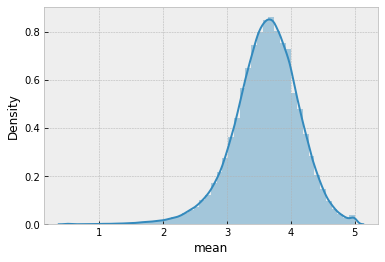

In [ ]:
sns.distplot(RatUser['mean'])

Se puede identificar un grupo de películas muy mal evaluadas y que el resto tiende a una distribución normal

### Bad Movies

Se considera películas malas como películas que fueron calificadas bajo los 3 puntos, ya que sobre 3 implica que la pelicula tiene tendencia a ser bien evaluada




In [ ]:
BadMovies=RatMovies[(RatMovies['mean']<=3 )]
BadMovies.sort_values(by='len',ascending=False)

,len,mean,Película,Año
movieId,,,,
344,44086.0,2.994715,Ace Ventura: Pet Detective (1994),1994
153,37243.0,2.900277,Batman Forever (1995),1995
231,37031.0,2.961357,Dumb & Dumber (Dumb and Dumber) (1994),1994
208,30951.0,2.871006,Waterworld (1995),1995
19,24276.0,2.648707,Ace Ventura: When Nature Calls (1995),1995
...,...,...,...,...
163547,31.0,2.887097,Equity (2016),2016
147262,31.0,2.887097,Faster than Rabbits (2014),2014
31636,31.0,2.790323,"Bunker, The (2001)",2001


### Eliminar películas malas o poco evaluadas


In [ ]:
ratings=ratings[(ratings['movieId'].isin(BadMovies.index)==False) & (ratings['movieId'].isin(RatMovies.index))]
ratings

,userId,movieId,rating
42,4,1,4.0
43,4,2,4.0
44,4,5,2.0
45,4,6,4.5
46,4,10,4.0
...,...,...,...
27753429,283228,6377,5.0
27753430,283228,6874,4.0
27753441,283228,34405,4.5
27753442,283228,44761,4.5


In [ ]:
df=pd.merge(movies,ratings,how='inner',on='movieId')
df

,movieId,title,year,Musical,Thriller,Sci-Fi,Documentary,Action,Animation,Mystery,Romance,Western,Children,Drama,Horror,Film-Noir,IMAX,Comedy,Crime,War,Adventure,(no genres listed),Fantasy,userId,rating
0,1,Toy Story (1995),1995,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,4,4.0
1,1,Toy Story (1995),1995,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,10,5.0
2,1,Toy Story (1995),1995,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,14,4.5
3,1,Toy Story (1995),1995,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,15,4.0
4,1,Toy Story (1995),1995,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,22,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16651764,192283,Crazy Rich Asians (2018),2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,261224,3.5
16651765,192283,Crazy Rich Asians (2018),2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,261870,0.5
16651766,192283,Crazy Rich Asians (2018),2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,266861,3.5
16651767,192283,Crazy Rich Asians (2018),2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,275841,3.0


# Usar Para importar datos

In [ ]:
df.to_csv ('df.csv')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/df.csv")
df

,Unnamed: 0,movieId,title,year,Musical,Thriller,Sci-Fi,Documentary,Action,Animation,Mystery,Romance,Western,Children,Drama,Horror,Film-Noir,IMAX,Comedy,Crime,War,Adventure,(no genres listed),Fantasy,userId,rating
0,0,1,Toy Story (1995),1995,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,4,4.0
1,1,1,Toy Story (1995),1995,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,10,5.0
2,2,1,Toy Story (1995),1995,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,14,4.5
3,3,1,Toy Story (1995),1995,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,15,4.0
4,4,1,Toy Story (1995),1995,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,22,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16651764,16651764,192283,Crazy Rich Asians (2018),2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,261224,3.5
16651765,16651765,192283,Crazy Rich Asians (2018),2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,261870,0.5
16651766,16651766,192283,Crazy Rich Asians (2018),2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,266861,3.5
16651767,16651767,192283,Crazy Rich Asians (2018),2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,275841,3.0


# Análisis de datos

## Descripción Ratings

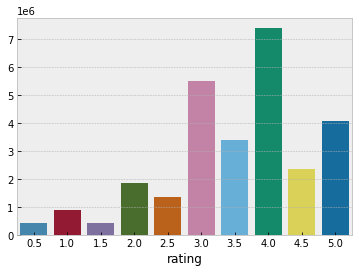

In [ ]:
# Histogram 
count=ratings.groupby(['rating']).count()['userId']
count
sns.barplot(x=count.index, y=count.values)

# Algoritmo 1 Machine Learning: Por popularidad

IMDB utiliza una fórmula para determinar la popularidad de las películas, la cual es: 
    
*Weighted Rating (WR)* = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

considerando:
* *v* número de votos para la película
* *m* votos mínimos requeridos para aparecer en el ranking
* *R* ranking promedio de la película
* *C* promedio de los votos entre todas las calificaciones


In [ ]:
C=rat_orig['rating'].mean()
rating_prom=rat_orig.groupby('movieId')['rating'].agg([len,np.mean])
m=rating_prom['len'].quantile(0.75)# Primer cuartil
rating_prom=rating_prom[rating_prom['len']>m]
rating_prom['Title']=movies['title'][rating_prom.index]
rating_prom['Weighted Rating']=(rating_prom['len']*rating_prom['mean']+m*C)/(m+rating_prom['len'])
rating_prom=rating_prom.sort_values(by='Weighted Rating',ascending=False)
rating_prom[['Title','Weighted Rating','len','mean']].head(10)

,Title,Weighted Rating,len,mean
movieId,,,,
171011,Planet Earth II (2016),4.425701,853.0,4.486518
318,"Shawshank Redemption, The (1994)",4.423660,97999.0,4.424188
159817,Planet Earth (2006),4.420804,1384.0,4.458092
170705,Band of Brothers (2001),4.351334,984.0,4.399898
174053,Black Mirror: White Christmas (2014),4.308270,1074.0,4.350559
50,"Usual Suspects, The (1995)",4.291243,62180.0,4.291959
527,Schindler's List (1993),4.256906,71516.0,4.257502
172591,The Godfather Trilogy: 1972-1990 (1992),4.240623,421.0,4.339667
2959,Fight Club (1999),4.230037,65678.0,4.230663


Ahora vemos que sucede al modificar el valor mínimo para entrar al raiting

In [ ]:
C=rat_orig['rating'].mean()
rating_prom=rat_orig.groupby('movieId')['rating'].agg([len,np.mean])
m=rating_prom['len'].quantile(0.95)# el 5% de películas con mayor raking
rating_prom=rating_prom[rating_prom['len']>m]
rating_prom['Title']=movies['title'][rating_prom.index]
rating_prom['Weighted Rating']=(rating_prom['len']*rating_prom['mean']+m*C)/(m+rating_prom['len'])
rating_prom=rating_prom.sort_values(by='Weighted Rating',ascending=False)
rating_prom[['Title','Weighted Rating','len','mean']].head(10)

,Title,Weighted Rating,len,mean
movieId,,,,
318,"Shawshank Redemption, The (1994)",4.403751,97999.0,4.424188
50,"Usual Suspects, The (1995)",4.264613,62180.0,4.291959
527,Schindler's List (1993),4.234637,71516.0,4.257502
2959,Fight Club (1999),4.206691,65678.0,4.230663
296,Pulp Fiction (1994),4.158077,92406.0,4.173971
5618,Spirited Away (Sen to Chihiro no kamikakushi) ...,4.145601,23227.0,4.207668
58559,"Dark Knight, The (2008)",4.141723,44741.0,4.173756
593,"Silence of the Lambs, The (1991)",4.135267,87899.0,4.151412
2571,"Matrix, The (1999)",4.132969,84545.0,4.149695


# Algoritmo 2 Machine Learning: ALS

Acá colocar explicación ALS

In [ ]:
#pip install pyspark

## Librerias Pyspark

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder
from pyspark.sql import *
from pyspark.sql.types import *

Importar Data

In [ ]:
#https://medium.com/@patelneha1495/recommendation-system-in-python-using-als-algorithm-and-apache-spark-27aca08eaab3
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Recommendation_system').getOrCreate()

Crear Spark Data Frame

In [ ]:
sdf = spark.read.csv('/content/drive/MyDrive/df.csv',header=True, inferSchema='True')
sdf.show()

+---+-------+----------------+----+-------+--------+------+-----------+------+---------+-------+-------+-------+--------+-----+------+---------+----+------+-----+---+---------+------------------+-------+------+------+
|_c0|movieId|           title|year|Musical|Thriller|Sci-Fi|Documentary|Action|Animation|Mystery|Romance|Western|Children|Drama|Horror|Film-Noir|IMAX|Comedy|Crime|War|Adventure|(no genres listed)|Fantasy|userId|rating|
+---+-------+----------------+----+-------+--------+------+-----------+------+---------+-------+-------+-------+--------+-----+------+---------+----+------+-----+---+---------+------------------+-------+------+------+
|  0|      1|Toy Story (1995)|1995|      0|       0|     0|          0|     0|        1|      0|      0|      0|       1|    0|     0|        0|   0|     1|    0|  0|        1|                 0|      1|     4|   4.0|
|  1|      1|Toy Story (1995)|1995|      0|       0|     0|          0|     0|        1|      0|      0|      0|       1|    0| 

## Entrenar el modelo

In [ ]:
train, test = sdf.randomSplit([0.8,0.2])

als=ALS(userCol="userId", itemCol="movieId", ratingCol="rating", coldStartStrategy="drop", nonnegative=True)
param_grid= ParamGridBuilder()\
            .addGrid(als.rank, [12,13,14])\
            .addGrid(als.maxIter, [18,19,20])\
            .addGrid(als.regParam, [.15,.16,.17])\
            .build()
evaluator=RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")

tvs= TrainValidationSplit(
    estimator=als,
    estimatorParamMaps=param_grid,
    evaluator=evaluator)

model=tvs.fit(train)

## Elegir el mejor modelo

In [ ]:
best_model=model.bestModel

predictions=best_model.transform(test)
rmse=evaluator.evaluate(predictions)

print("RMSE = "+str(rmse))
print("*Best Model*")
print(" Rank: ", best_model.rank)
print(" MaxIter: ", best_model._java_obj.parent().getMaxIter())
print(" RegParam: ", best_model._java_obj.parent().getRegParam())

RMSE = 0.8277782397049603
*Best Model*
 Rank:  13
 MaxIter:  20
 RegParam:  0.15


## Ejemplo de prueba

In [ ]:
muestrasCalif={(30000,1):5,(30000,152017):5,(30000,5378):5,(30000,66097):1,
               (30000,2324):5,(30000,136864):2,(30000,8533):5,
               (40001,72998):5,(40001,5378):5,(40001,106002):5,(40001,4993):5,
               (40001,175303):5,(40001,176371):1,(40001,175197):3,
               (50001,7293):4,(50001,102716):5,(50001,117176):5,
               (50001,5218):4,(60001,2571):5,(60001,73017):5,(60001,6539):5,
               (60001,91630):5}
prueba=pd.DataFrame([[key[0],key[1],muestrasCalif[key]] for key in muestrasCalif.keys()],columns=['userId','movieId','rating'])
Pruebas=pd.merge(movies,prueba,how='inner',on='movieId')


## Transformar muestra de prueba a Spark Data Frame

In [ ]:
sparkDf = spark.createDataFrame(Pruebas)
sparkDf.show()

+-------+--------------------+----+----+--------+---------+-------+---------+------------------+------+--------+------+-------+-------+---+-----+------+-----------+-------+-----+---------+-------+------+------+------+
|movieId|               title|year|IMAX|Children|Adventure|Western|Film-Noir|(no genres listed)|Action|Thriller|Horror|Romance|Mystery|War|Drama|Comedy|Documentary|Musical|Crime|Animation|Fantasy|Sci-Fi|userId|rating|
+-------+--------------------+----+----+--------+---------+-------+---------+------------------+------+--------+------+-------+-------+---+-----+------+-----------+-------+-----+---------+-------+------+------+------+
|      1|    Toy Story (1995)|1995|   0|       1|        1|      0|        0|                 0|     0|       0|     0|      0|      0|  0|    0|     1|          0|      0|    0|        1|      1|     0| 30000|     5|
|   2324|Life Is Beautiful...|1997|   0|       0|        0|      0|        0|                 0|     0|       0|     0|      1| 

## Recomendar a la muestra de prueba

In [ ]:
n=7
recommendations = best_model.recommendForUserSubset(sparkDf,n).toPandas()
recommendations

,userId,recommendations
0,60001,"[(169252, 3.8889009952545166), (52104, 3.88075..."
1,30000,"[(318, 5.023916721343994), (170705, 4.98787784..."
2,40001,"[(318, 4.753310203552246), (170705, 4.71772146..."
3,50001,"[(165069, 5.283397674560547), (93404, 5.195976..."


## Recomendaciones a usuarios de prueba

In [ ]:
usuarios=['Urra','Juan Pablo','Matías','Ignacio']
for a in range(len(recommendations)):
  print('Al usuario',usuarios[a])
  for b in range(n):
    print('Con un rating esperado de ',round(recommendations['recommendations'][a][b][1],2),'se le recomienda la película:',movies['title'][recommendations['recommendations'][a][b][0]])
  print()

Al usuario Urra
Con un rating esperado de  3.89 se le recomienda la película: Everything Will Be OK (2006)
Con un rating esperado de  3.88 se le recomienda la película: Moment of Innocence, A (Nun va Goldoon) (1996)
Con un rating esperado de  3.86 se le recomienda la película: Werckmeister Harmonies (Werckmeister harmóniák) (2000)
Con un rating esperado de  3.83 se le recomienda la película: Classe américaine, La (a.k.a. Le grand détournement) (1993)
Con un rating esperado de  3.83 se le recomienda la película: Personal Journey with Martin Scorsese Through American Movies, A (1995)
Con un rating esperado de  3.81 se le recomienda la película: Satan's Tango (Sátántangó) (1994)
Con un rating esperado de  3.81 se le recomienda la película: Century of the Self, The (2002)

Al usuario Juan Pablo
Con un rating esperado de  5.02 se le recomienda la película: Shawshank Redemption, The (1994)
Con un rating esperado de  4.99 se le recomienda la película: Band of Brothers (2001)
Con un rating esp

# Algoritmo 3 Machine Learning: KNN



## Librería

In [ ]:
from sklearn.neighbors import NearestNeighbors

## Importar Data

In [ ]:
data=df[['userId','movieId','rating']][14000000:17000000]
df_features=data.pivot_table(index='movieId',columns='userId',values='rating').fillna(0)
df_features

userId,14,15,27,28,32,34,35,36,42,48,56,65,67,71,72,73,74,75,76,81,82,88,90,94,97,99,106,107,116,119,134,136,137,150,151,172,173,176,197,200,...,283054,283062,283063,283074,283075,283080,283082,283103,283105,283117,283125,283131,283133,283137,283140,283142,283143,283150,283161,283163,283164,283165,283170,283171,283173,283175,283182,283183,283184,283188,283189,283190,283191,283193,283195,283199,283206,283210,283219,283227
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
67788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Entrenar el modelo

In [ ]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(df_features)

## Probar el modelo

In [ ]:
#query_index = np.random.choice(df_features.index)
query_index=152017
print(query_index)

152017


In [ ]:
distances, indices = nbrs.kneighbors(df_features.loc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [ ]:
print(indices)

[[2944 3005 3295 3269 2822 3281]]


In [ ]:
print(distances)

[[  0.         116.2013339  116.43345739 116.50643759 116.69832904
  116.84070352]]


## Generar recomendaciones a partir de una película

In [ ]:
for i in range(len(indices.flatten())):
    if i == 0:
        print('Recomendación para {0}:\n'.format(movies['title'][query_index]))
    else:
        print('{0}: {1}, con una distancia de {2}:'.format(i,movies['title'][df_features.index[indices.flatten()[i]]], distances.flatten()[i]))

Recommendations for Me Before You (2016):

1: The Choice (2016), with distance of 116.20133389940065:
2: Everything, Everything (2017), with distance of 116.43345739090633:
3: Fallen (2016), with distance of 116.50643759037524:
4: Beauty & the Briefcase (2010), with distance of 116.69832903688038:
5: The Last Word (2017), with distance of 116.84070352407161:


# Algoritmo 4 Machine Learning: Colaborative Filtering


In [ ]:
#pip install surprise

## Líbrerias Surprise

In [ ]:
from surprise import dataset,Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
reader = Reader(line_format='user item rating', rating_scale=(1, 5))
df_sur=df[['userId','movieId','rating']]

## Generar Dataset

In [ ]:
class MyDataset(dataset.DatasetAutoFolds):

    def __init__(self, df, reader):

        self.raw_ratings = [(uid, iid, r, None) for (uid, iid, r) in
                            zip(df['userId'], df['movieId'], df['rating'])]
        self.reader=reader
data = MyDataset(df_sur, reader)
trainset, testset = train_test_split(data, test_size=.20)

## Entrenar Modelo

In [ ]:
model = SVD()
model.fit(trainset)
predictions = model.test(testset)

## Métricas Modelo

In [ ]:
accuracy.rmse(predictions)

RMSE: 0.7910


0.7910032162864641

## Probar Modelo

In [ ]:
user = str(196)  
item = str(303)  

pred = model.predict(user, item, verbose=True)

user: 196        item: 303        r_ui = None   est = 3.63   {'was_impossible': False}


# Conclusión

En el presente proyecto se puede observar lo complejo que es realizar recomendaciones, ya que esta actividad no corresponde a una ciencia cierta, ya que no es raro que nos encontremos con una película muy recomendada que no sea de nuestro gusto para nada, o, al contrario, existen situaciones en que una película que muchas personas nos decía ser horrible, termina gustándonos.
Cada vez es más masivo el negocio del entretenimiento en streaming, la competencia es feroz, incluso existen líneas de celulares que lanzaron sus servicios de streaming. Por lo cual, estas compañías están siempre buscando la mejor forma para retener a sus clientes y atraer nuevos clientes.  Bajo esta motivación los algoritmos de recomendación se hacen cada vez más necesarios.

Se utilizó el algoritmo más común que es por popularidad, por su simplicidad es muy usado, sobre todo en páginas web de contenido con menos recursos y conocimientos en Machine Learning. Nos permite evaluar las películas según qué tan populares son, equilibrando la puntuación y la cantidad de puntuaciones que ha recibido. Este modelo es muy básico y poco preciso, ya que no genera recomendaciones personalizadas.

Posterior a ello se desarrolló el algoritmo ALS, el cual generó muy buenos resultados, aunque sucedía que antes de limitar que una película debía estar al menos 30 veces evaluada para ser considerada, este algoritmo tendía a recomendar películas poco reproducidas y de mala calidad. Por esto se tomó la decisión de aumentar este requerimiento, que permitió mejorar considerablemente el modelo. Si bien tiene métricas bastante bajas, es importante controlar su desempeño y probar los resultados.

El algoritmo KNN nos compara nuestros gustos con las K personas más similares y a partir de ello realiza la recomendación. Tiene como ventaja la simplicidad, pero no se consiguió poder utilizar más de 3 millones de datos, debido a que la matriz utilizada para la predicción coloca a los usuarios en las columnas y las películas en las filas, ya que el problema del KNN funciona bien con muestras más pequeñas.

Y finalmente el Colaborative Filtering que obtuvo un RMSE menor que el obtenido en el uso del ALS, siendo que ocupa menos datos que el ALS, utilizando únicamente los usuarios, las películas y las calificaciones. Dado a la métrica del RMSE seleccionamos el mejor modelo y validamos el modelo a distintos usurarios, cuyos resultados se aprecian en el Anexo.

Podemos señalar que se considera el mejor modelo al filtro colaborativo, que fue el que generó mejores resultados con un tiempo de ejecución relativamente bajo. Aunque en situaciones con bajo o nulo número de datos, se recomienda el uso del modelo de popularidad. Y en caso de que una persona se encuentre en búsqueda de una película similar a la que le gusta se recomienda el uso de KNN, ya que simplifica bastante la búsqueda, y es fácilmente actualizable.
